In [2]:
%reset -f
import ROOT

%run -i eppi0_columns.py

df = ROOT.RDataFrame("h22","data/lvl2_eppi0.inb.qa.eloss.root")
#df = ROOT.RDataFrame("h22","data/lvl2_eppi0.inb.qa.root")
#df = ROOT.RDataFrame("h22","data/mc.root")

df = define_eppi0_columns_using_proton(df)

%run -i eppi0_binning_scheme_v2.py
shards,df  = define_eppi0_bins(df,"inb")

hqx = df.Histo2D(("hqx",";x_{B};Q^{2} [GeV^{2}]",200,0,0.84,200,1.5,12), "xb","q2")

Welcome to JupyROOT 6.24/04


['vals', 'pe', 'the', 'fie', 'pp', 'thp', 'fip', 'pg1', 'thg1', 'fig1', 'pg2', 'thg2', 'fig2', 'mm2', 'mgg', 'q2', 'ww', 'xb', 'tt', 'phistar', 'ftheta', 'misse', 'dpx', 'dpy', 'dpz', 'dphi', 'dtheta', 'dfi', 'ipb', 'iqx', 'itt', 'ifi', 'ihel', 'ex', 'ey', 'ez', 'px', 'py', 'pz', 'g1x', 'g1y', 'g1z', 'g2x', 'g2y', 'g2z', 'idet', 'esec', 'psec', 'g1sec', 'g2sec', 'run', 'status', 'px0', 'py0', 'pz0', 'npros', 'npi0s']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


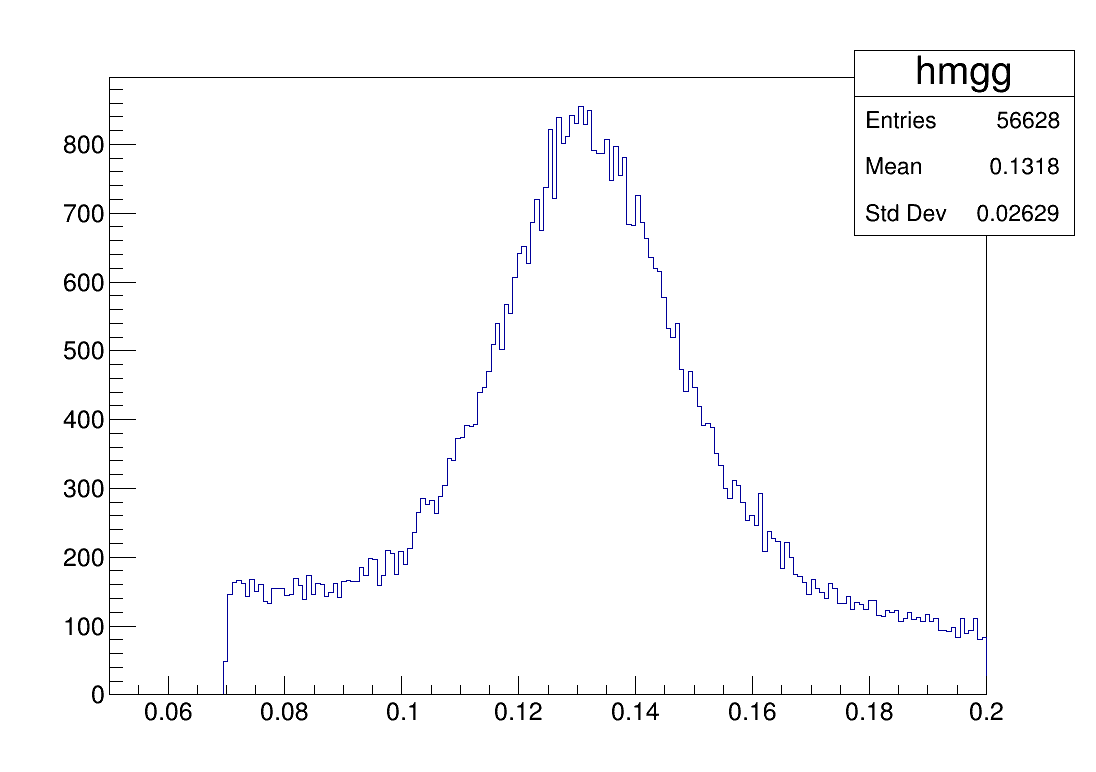

In [70]:
print(list(df.GetColumnNames()))

c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()

rdf = df.Define("g1","sqrt(g1x*g1x + g1y*g1y + g1z*g1z)").Define("g2","sqrt(g2x*g2x + g2y*g2y + g2z*g2z)")
rdf = rdf.Define("dgsec","abs(g2sec-g1sec)")
rdf = rdf.Define("dpt","sqrt(dpx*dpx + dpy*dpy)")


rdf = rdf.Filter("g1>0.6 && g2>0.6 && dgsec<2")


hdgsec = rdf.Histo1D(("hdgsec","",6,1,7), "dgsec")
hdgsec.Draw()

hg1 = rdf.Histo1D(("hg1","",200,0,2), "g1")
hg2 = rdf.Histo1D(("hg2","",200,0,2), "g2")

hg = hg1.GetValue()+hg2.GetValue()

hg2.Draw()

hmm2g2 = rdf.Histo2D(("hmm2g2","",100,0,1,100,-0.5,1),"g2","mm2")
hmm2g2.Draw("colz")

hmggg2 = rdf.Histo2D(("hmm2g2","",100,0,1,100,0.05,0.2),"g2","mgg")
hmggg2.Draw("colz")

hmgg = rdf.Filter("npi0s==2").Histo1D(("hmgg","",200,0.05,0.2), "mgg")
hmgg.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


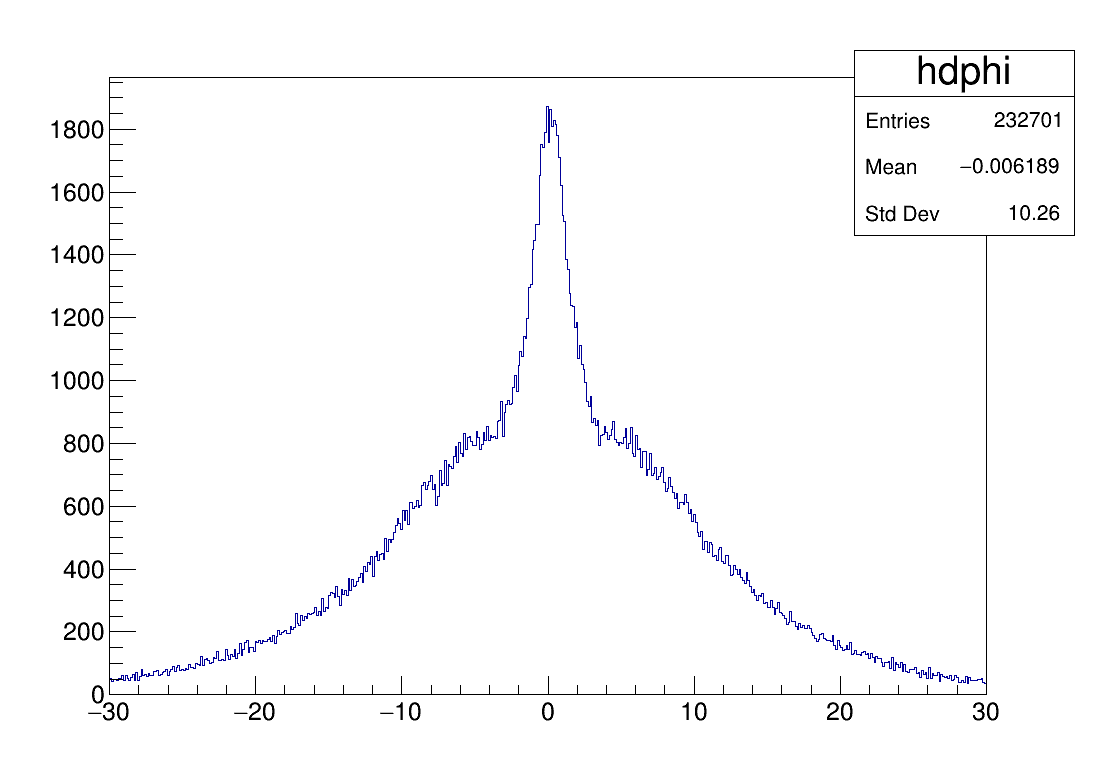

In [71]:
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()

hdphi = rdf.Filter("ftheta>2").Histo1D(("hdphi","",500,-30,30), "dphi")
hdphiftheta = rdf.Histo2D(("hdphiftheta","",160,-30,30, 200,0,10), "dphi", "ftheta")
hdphidfi = rdf.Histo2D(("hdphiftheta","",160,-30,30, 200,130,210), "dphi", "dfi")

hdphidfi.Draw("colz")
hdphi.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


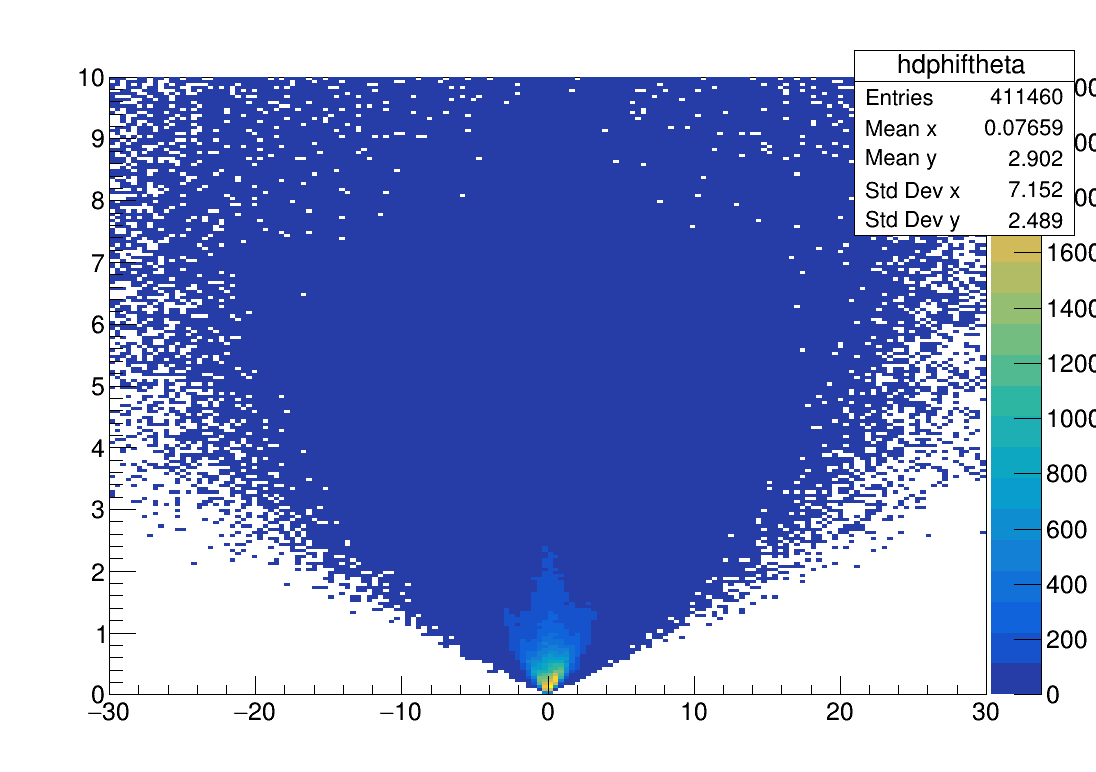

In [72]:
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()

hdphiftheta.Draw("colz")

1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


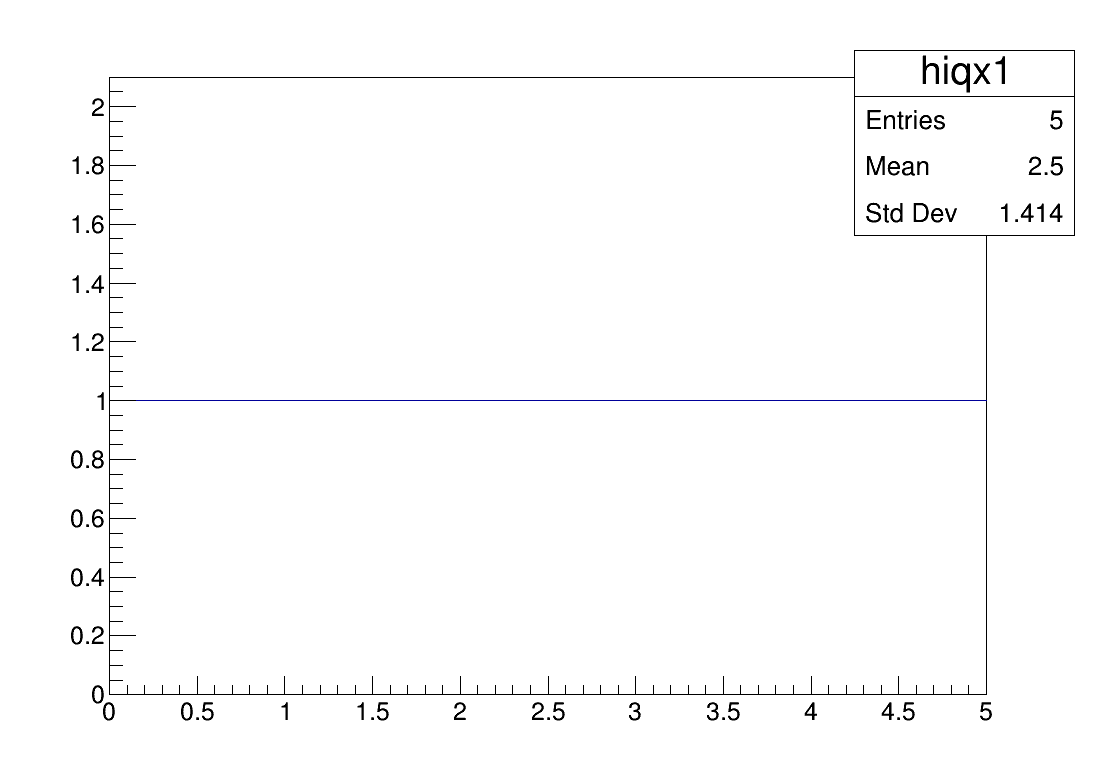

In [73]:
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()
hiqx0 = rdf.Histo1D(("hiqx0","",5,0,5), "iqx")
hiqx1 = rdf.Filter("g2>0.6").Histo1D(("hiqx1","",5,0,5), "iqx")

print(hiqx1.GetEntries()/hiqx0.GetEntries())

hiqx = hiqx1.GetValue()
hiqx.Divide(hiqx0.GetValue())
hiqx.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


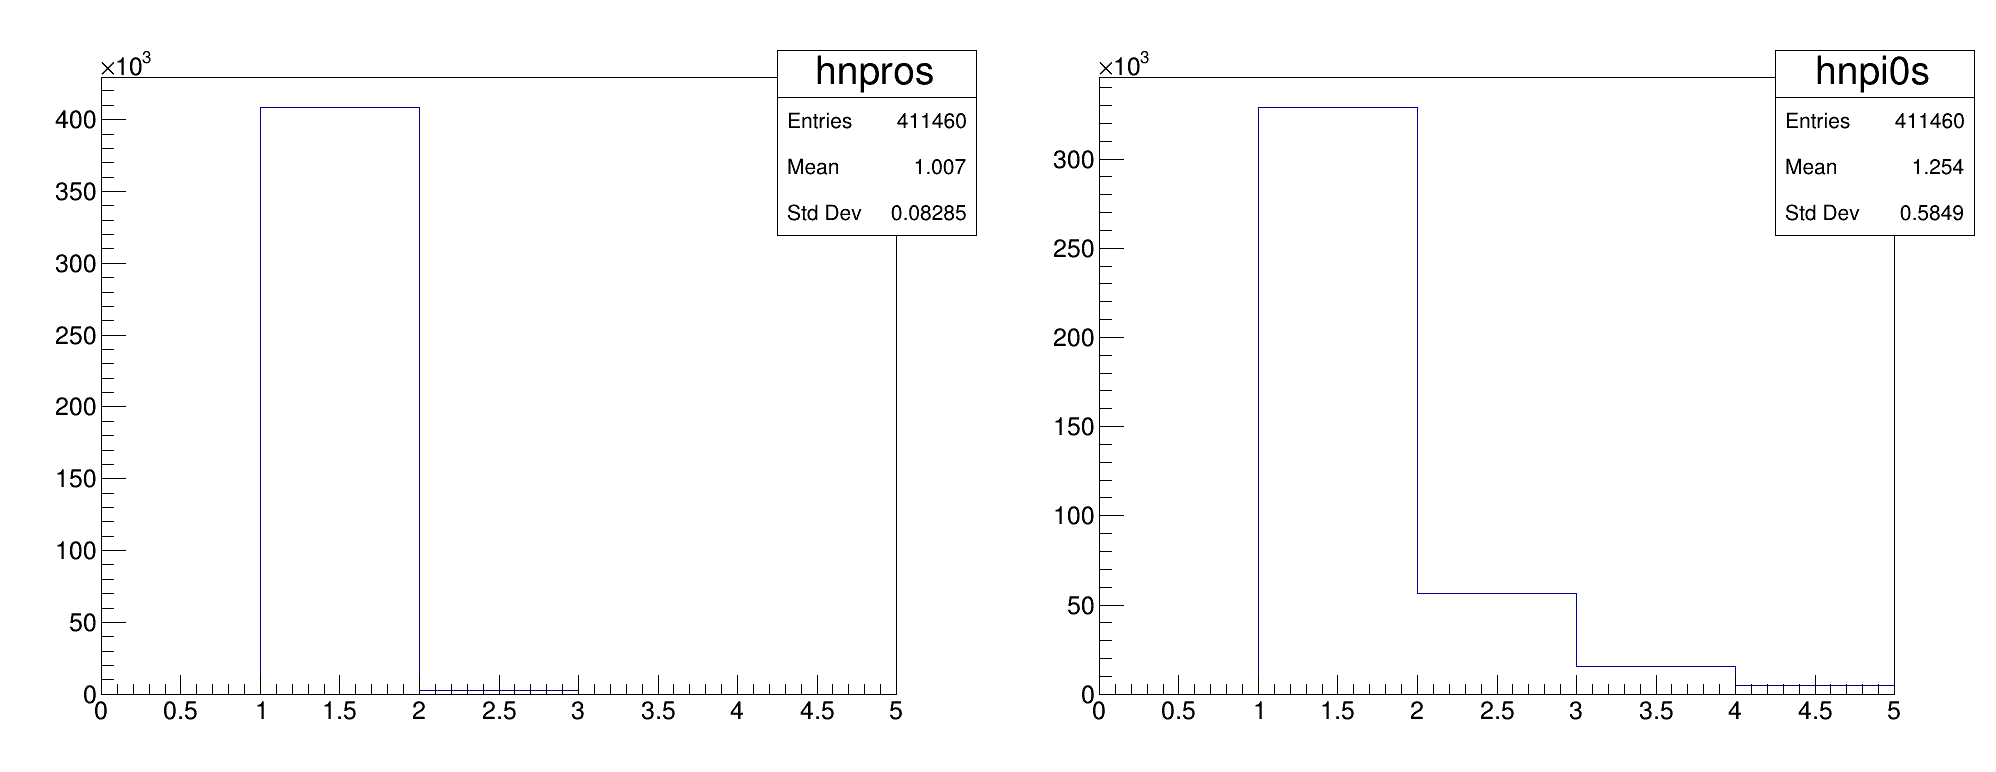

In [74]:
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1,0.001,0.001)
c1.Draw()

hnpros = rdf.Histo1D(("hnpros","",5,0,5), "npros")

hnpi0s = rdf.Histo1D(("hnpi0s","",5,0,5), "npi0s")



c1.cd(1)
hnpros.Draw()
c1.cd(2)
hnpi0s.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


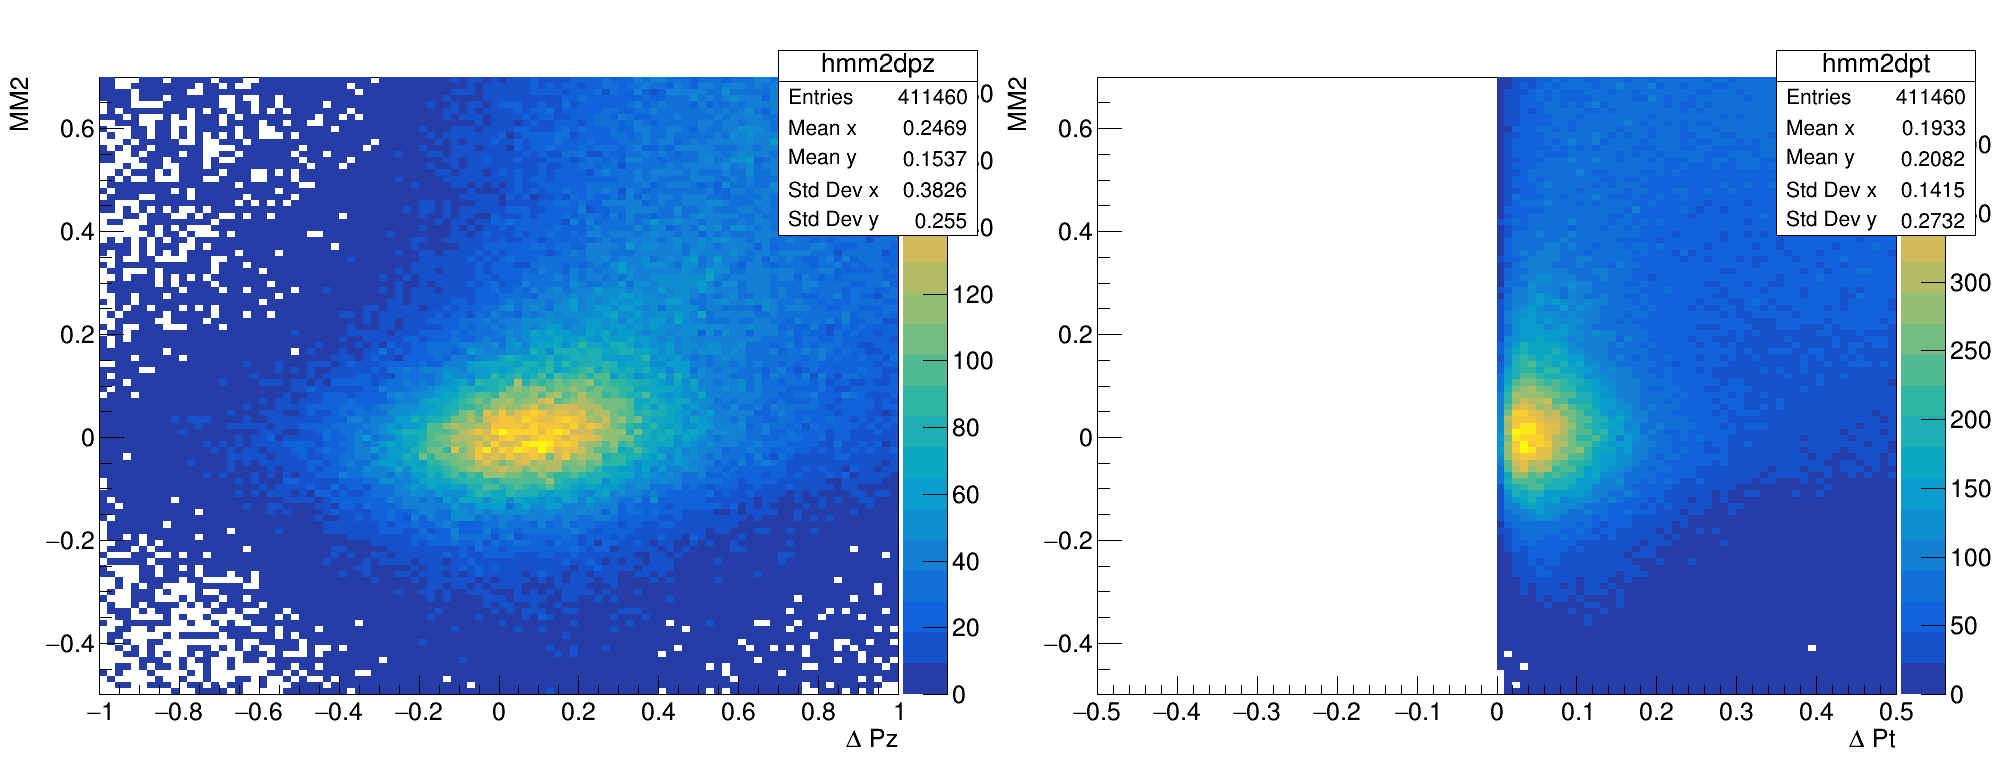

In [75]:
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1,0.0001,0.0001)
c1.Draw()


c1.cd(1)
hfth = rdf.Histo1D(("hfth","",100,0,50), "ftheta")
#hfth.Draw()

c1.cd(2)
hmm2 = rdf.Filter("ftheta<2").Histo1D(("hmm2","",100,-0.5,1), "mm2")
#hmm2.Draw()
hmisse = rdf.Histo1D(("hmisse","",100,-0.5,1), "misse")
#hmisse.Draw()

c1.cd(1)
hmm2misse = rdf.Histo2D(("hmm2misse",";missing energy;MM2",100,-1,1, 100,-0.5,0.7), "misse","mm2")
#hmm2misse.Draw("colz")

c1.cd(1)
hmm2dpz = rdf.Histo2D(("hmm2dpz",";#Delta Pz;MM2",100,-1,1, 100,-0.5,0.7), "dpz","mm2")
hmm2dpz.Draw("colz")

c1.cd(2)
hmm2dpt = rdf.Histo2D(("hmm2dpt",";#Delta Pt;MM2",100,-0.5,0.5, 100,-0.5,0.7), "dpt","mm2")
hmm2dpt.Draw("colz")



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


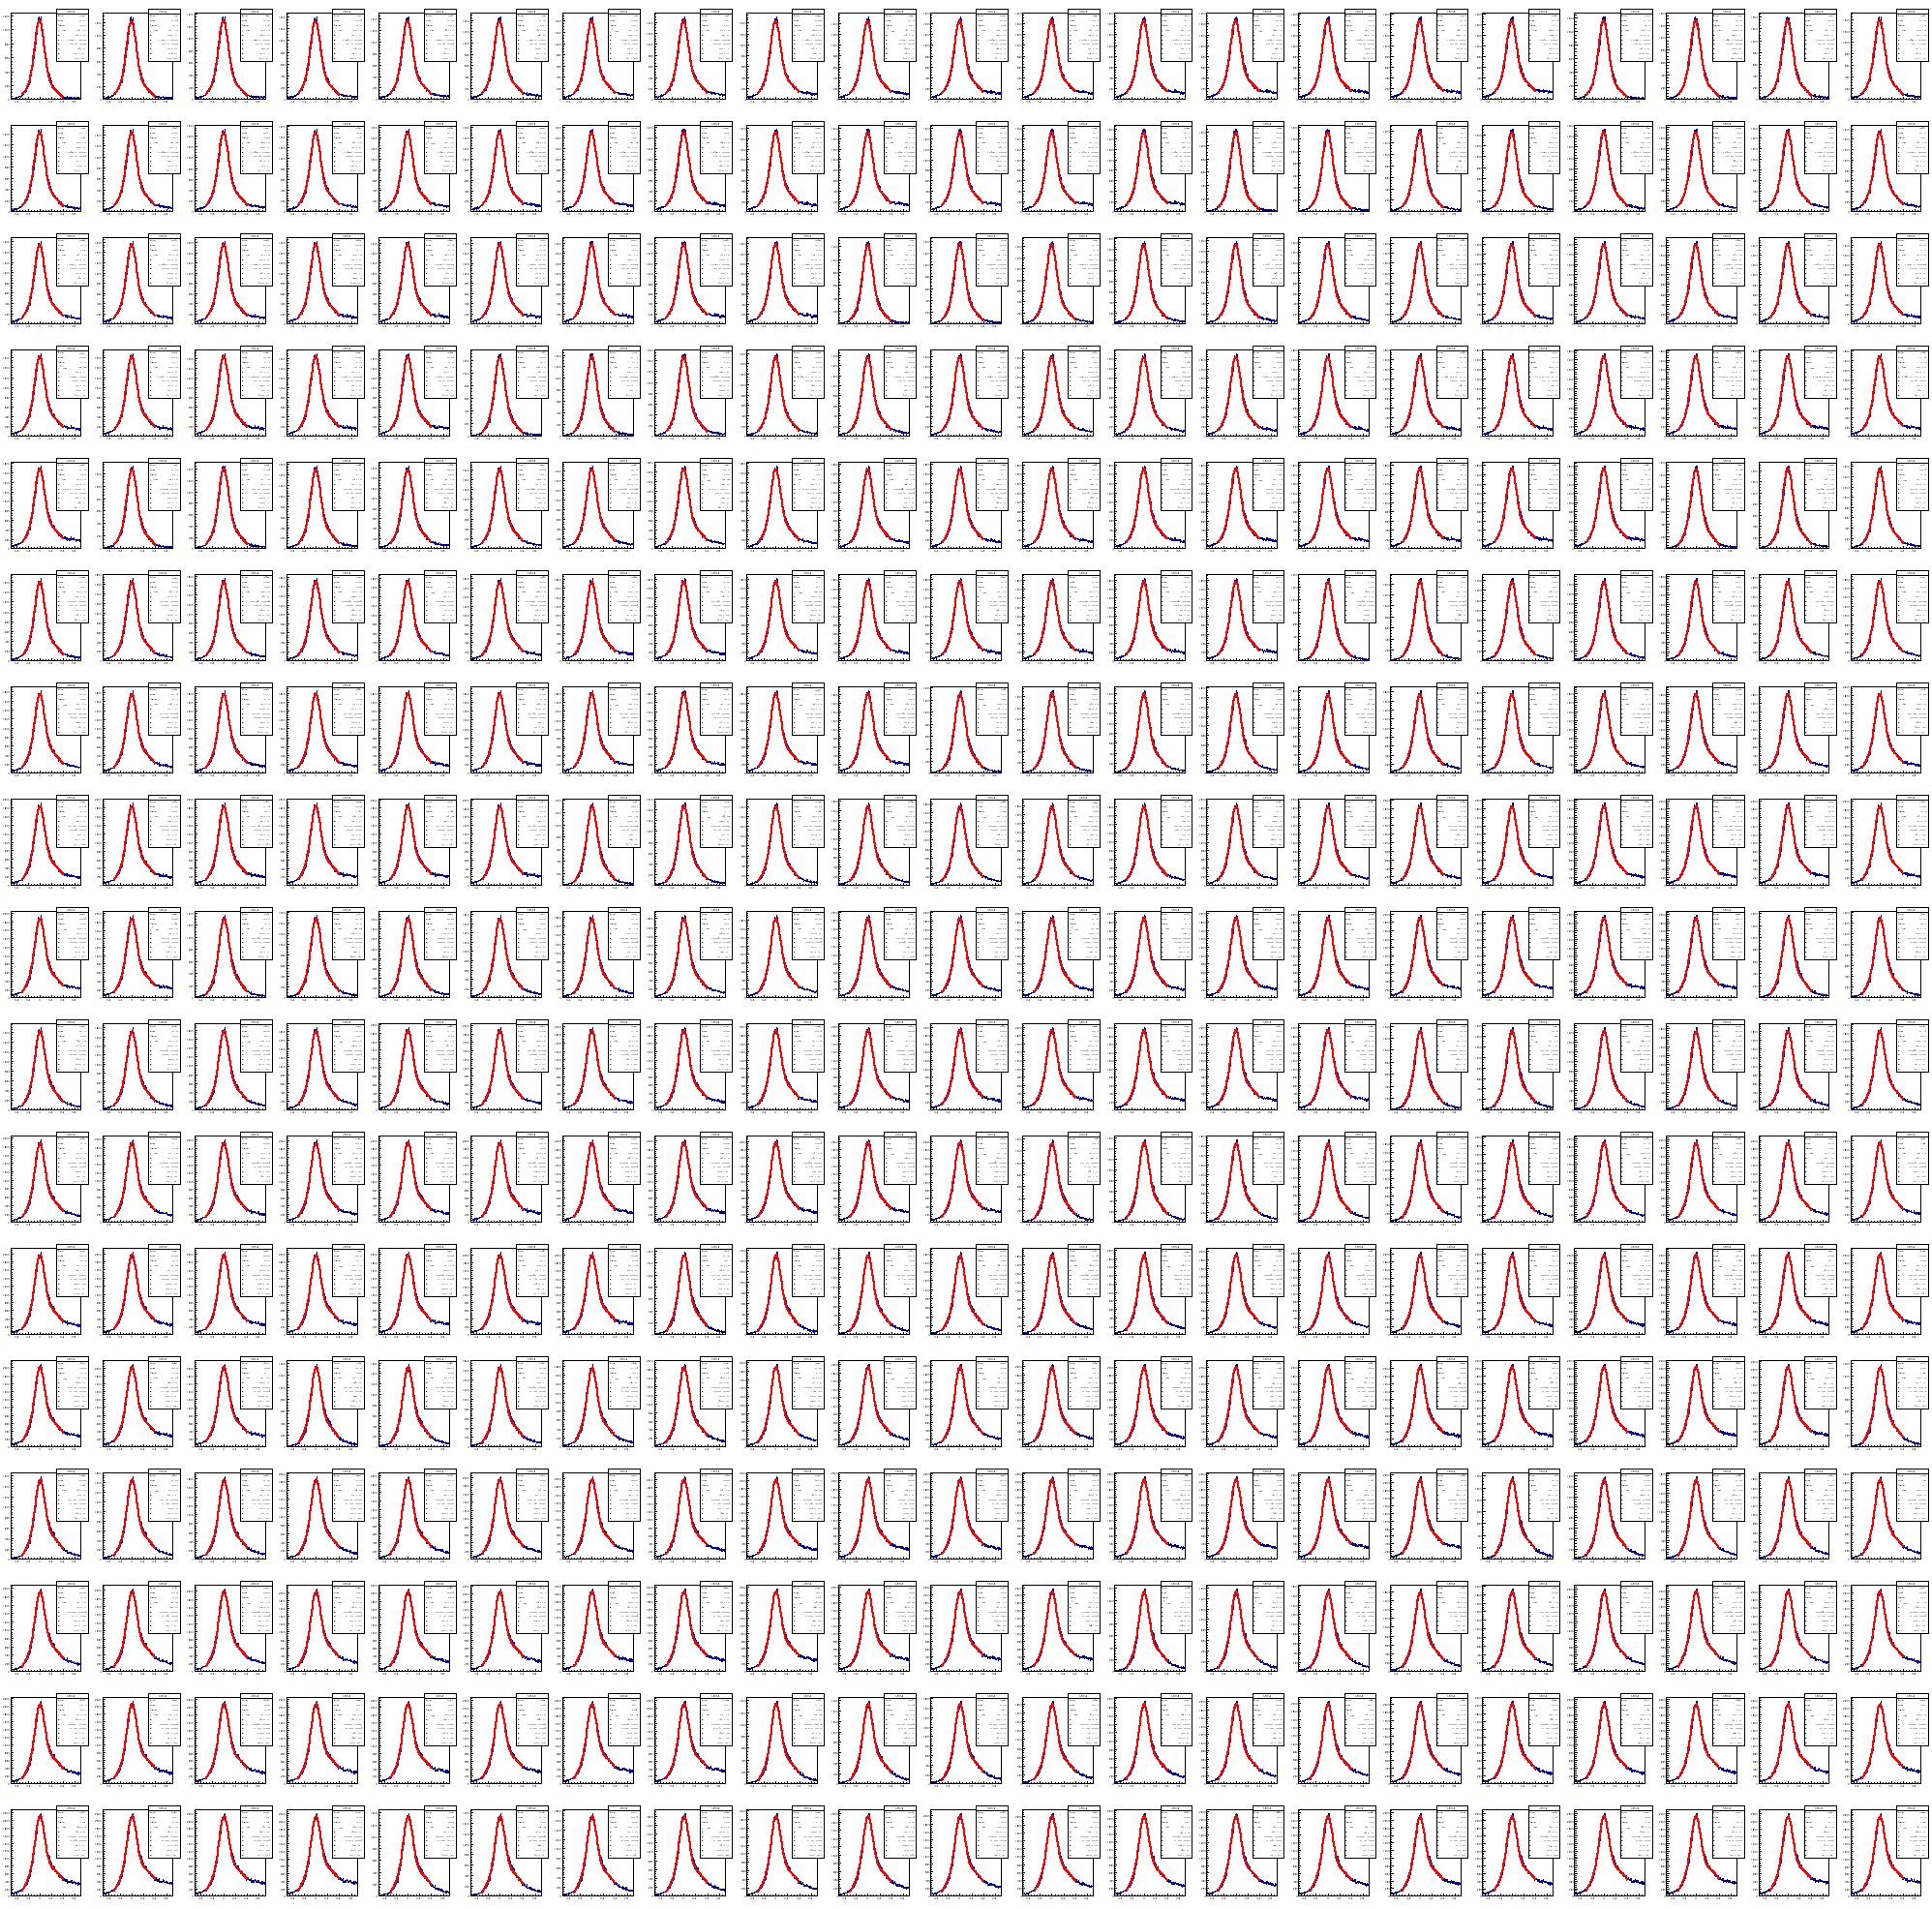

In [76]:
import numpy

ROOT.gStyle.SetOptFit(1)

#rdf = rdf.Filter("ftheta<2")

dpzs = numpy.arange(0.2,0.61, 0.02)
dpts = numpy.arange(0.1,0.43,0.02)

hmm2s = []
for dpz in dpzs:
    hmm2s.append([])
    for dpt in dpts:
        hmm2 = rdf.Filter(f"dpt<{dpt} && dpz<{dpz}").Histo1D(("hmm2","",240,-0.5,0.7), "mm2")
        setattr(hmm2, "dpz", dpz)
        setattr(hmm2, "dpt", dpt)
        hmm2s[-1].append(hmm2)


c1 = ROOT.TCanvas("c1","c1",2000,2000)
c1.Divide(len(dpzs), len(dpts), 0.001,0.001)
c1.Draw()

data = []
ipad=0
for h1s in hmm2s:
    data.append([])
    for h1 in h1s:
        ipad+=1
        c1.cd(ipad)
        #c1.cd(0)
        h1.Draw()

        #hbg = h1.ShowBackground()
        #h1.Add(hbg, -1)
        
        f1 = ROOT.TF1("f1","gausn(0)+pol2(3)",-0.3,0.4)
        f1.SetParameters(1,0,0.1, 1,1)
        h1.Fit(f1,"QR")
        f1.SetLineWidth(1)
        
        data[-1].append((h1.dpz, h1.dpt, f1.GetParameter(0), f1.GetParError(0)))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


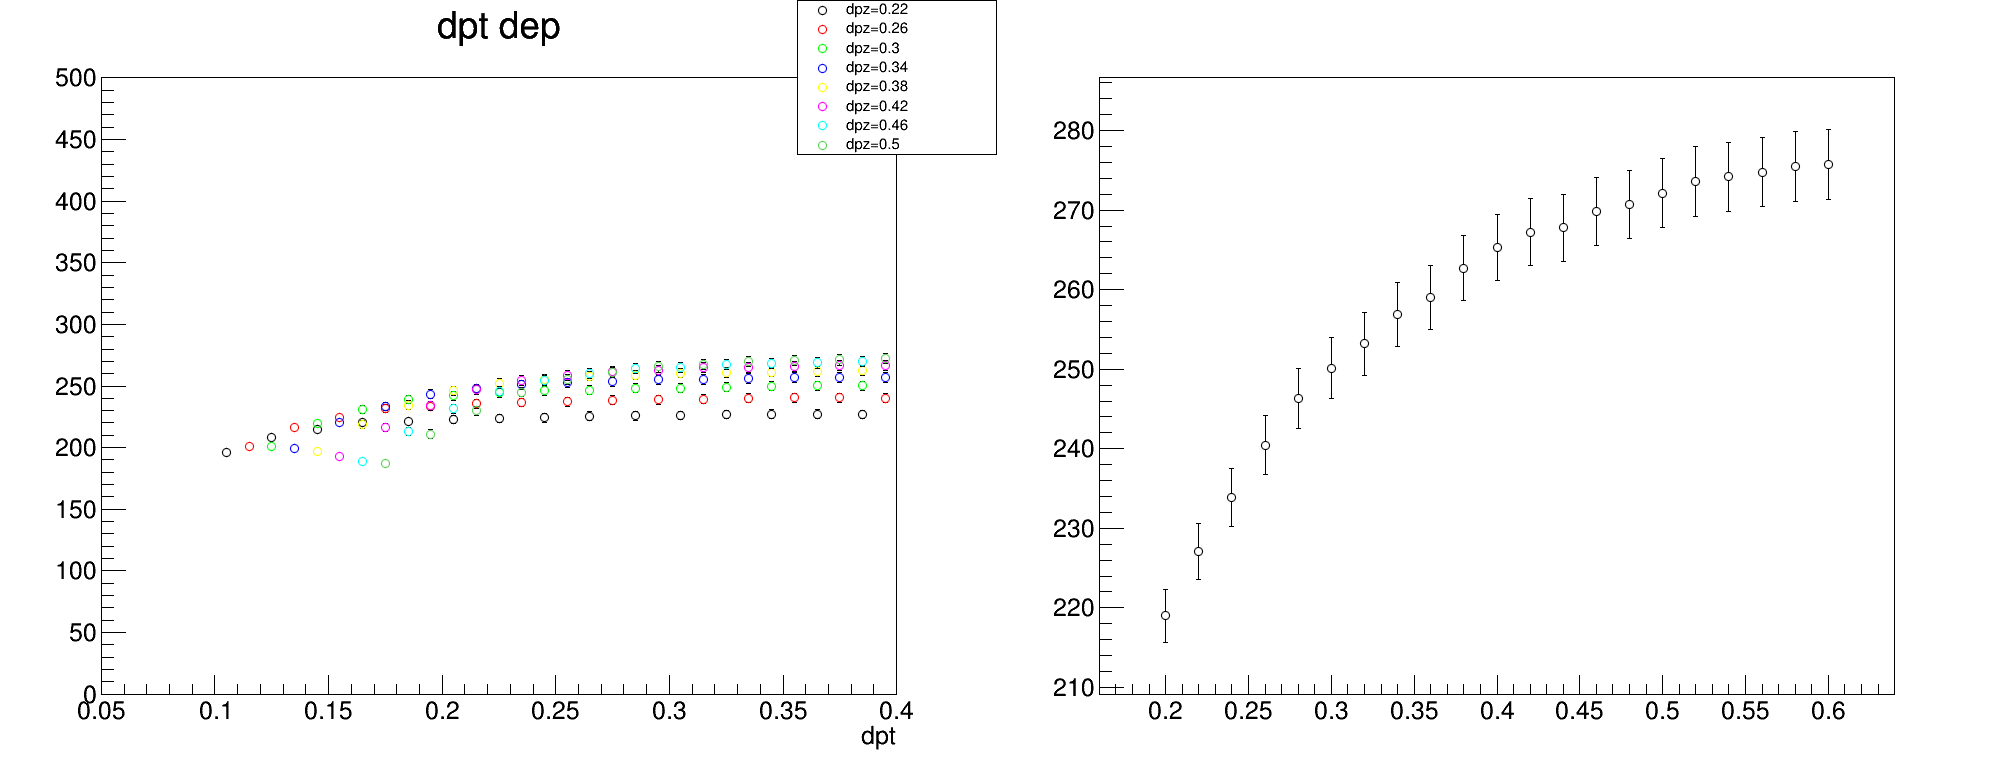

In [77]:
vsts = [ROOT.TGraphErrors() for i in range(len(dpzs))]
vszs = {}

for iz in range(len(dpzs)):
    for it in range(len(dpts)):
        dpz, dpt, num, dnum = data[iz][it]
        setattr(vsts[iz], 'dpz', dpz)
        vsts[iz].SetMarkerStyle(24)
        vsts[iz].SetPoint(vsts[iz].GetN(), dpt+iz*0.005, num)
        vsts[iz].SetPointError(vsts[iz].GetN()-1, 0, dnum)

        if round(dpt,2) not in vszs: vszs[round(dpt,2)] = ROOT.TGraphErrors()
        vsz = vszs[round(dpt,2)]
        vsz.SetMarkerStyle(24)
        vsz.SetPoint(vsz.GetN(),dpz,num)
        vsz.SetPointError(vsz.GetN()-1,0,dnum)

c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1,0.001,0.001)
c1.Draw()

c1.cd(1).DrawFrame(0.05,0,0.4,500).SetTitle("dpt dep;dpt")
iz = 0
leg = ROOT.TLegend(0.8,0.8,1,1)
for vst in vsts[1:17:2]:
    iz+=1
    vst.SetMarkerColor(iz)
    vst.Draw("P")
    leg.AddEntry(vst,f"dpz={round(vst.dpz,2)}","P")
leg.Draw()

c1.cd(2)
vszs[0.42].Draw("AP")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


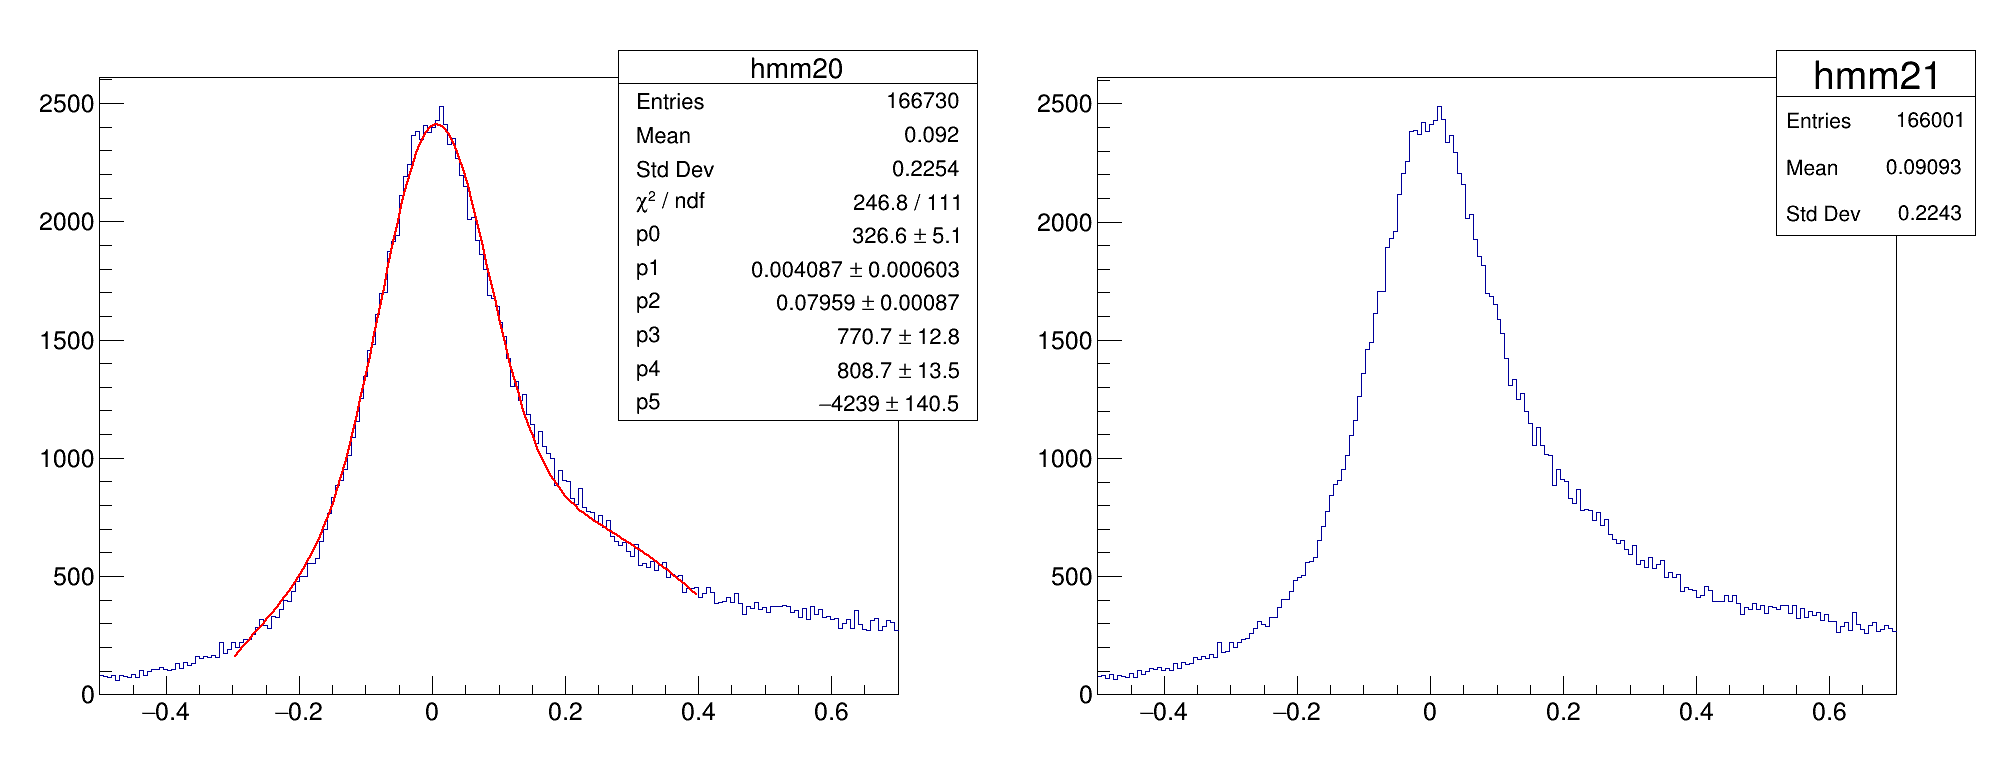

In [78]:
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1,0.0001,0.0001)
c1.Draw()

c1.cd(1)
hmm20 = rdf.Filter("dpt<0.3 && dpz<0.5").Histo1D(("hmm20","",200,-0.5,0.7), "mm2")
#hmm2 = rdf.Filter("dpt>0.25 && dpz<0.45 && dpt<0.35").Histo1D(("hmm2","",200,-0.5,0.7), "mm2")
hmm20.Draw()
#hmm20.Add(hmm20.ShowBackground(), -1)
f1 = ROOT.TF1("f1","gausn(0)+pol2(3)",-0.3,0.4)
f1.SetParameters(1,0,0.1, 1,1)
hmm20.Fit(f1,"QR")

c1.cd(2)
hmm21 = rdf.Filter("abs(dphi)<10 && dpt<0.4 && dpz<0.5").Histo1D(("hmm21","",200,-0.5,0.7), "mm2")
hmm21.Draw()



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


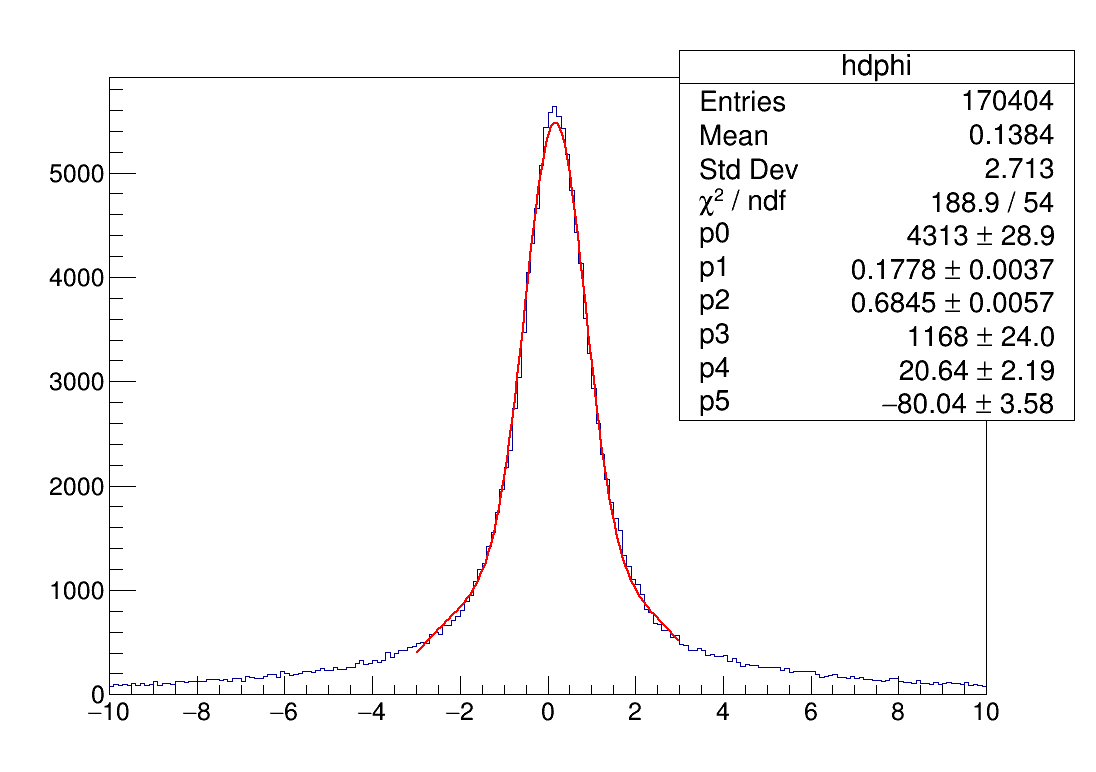

In [96]:
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()

hth = rdf.Filter("dpt<0.4 && dpz<0.5 && abs(dphi-180)<10").Histo1D(("hth","",200,0,10), "ftheta")
#hth.Draw()

hdphi = rdf.Filter("abs(dpx)<0.4 && abs(dpy)<0.4 && abs(dpz)<0.5").Histo1D(("hdphi","",200,-10,10), "dphi")
fdphi = ROOT.TF1("fdphi","gaus(0)+pol2(3)",-3,3)
fdphi.SetParameters(1000,0,1,1,1)
hdphi.Fit(fdphi,"QR")
hdphi.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


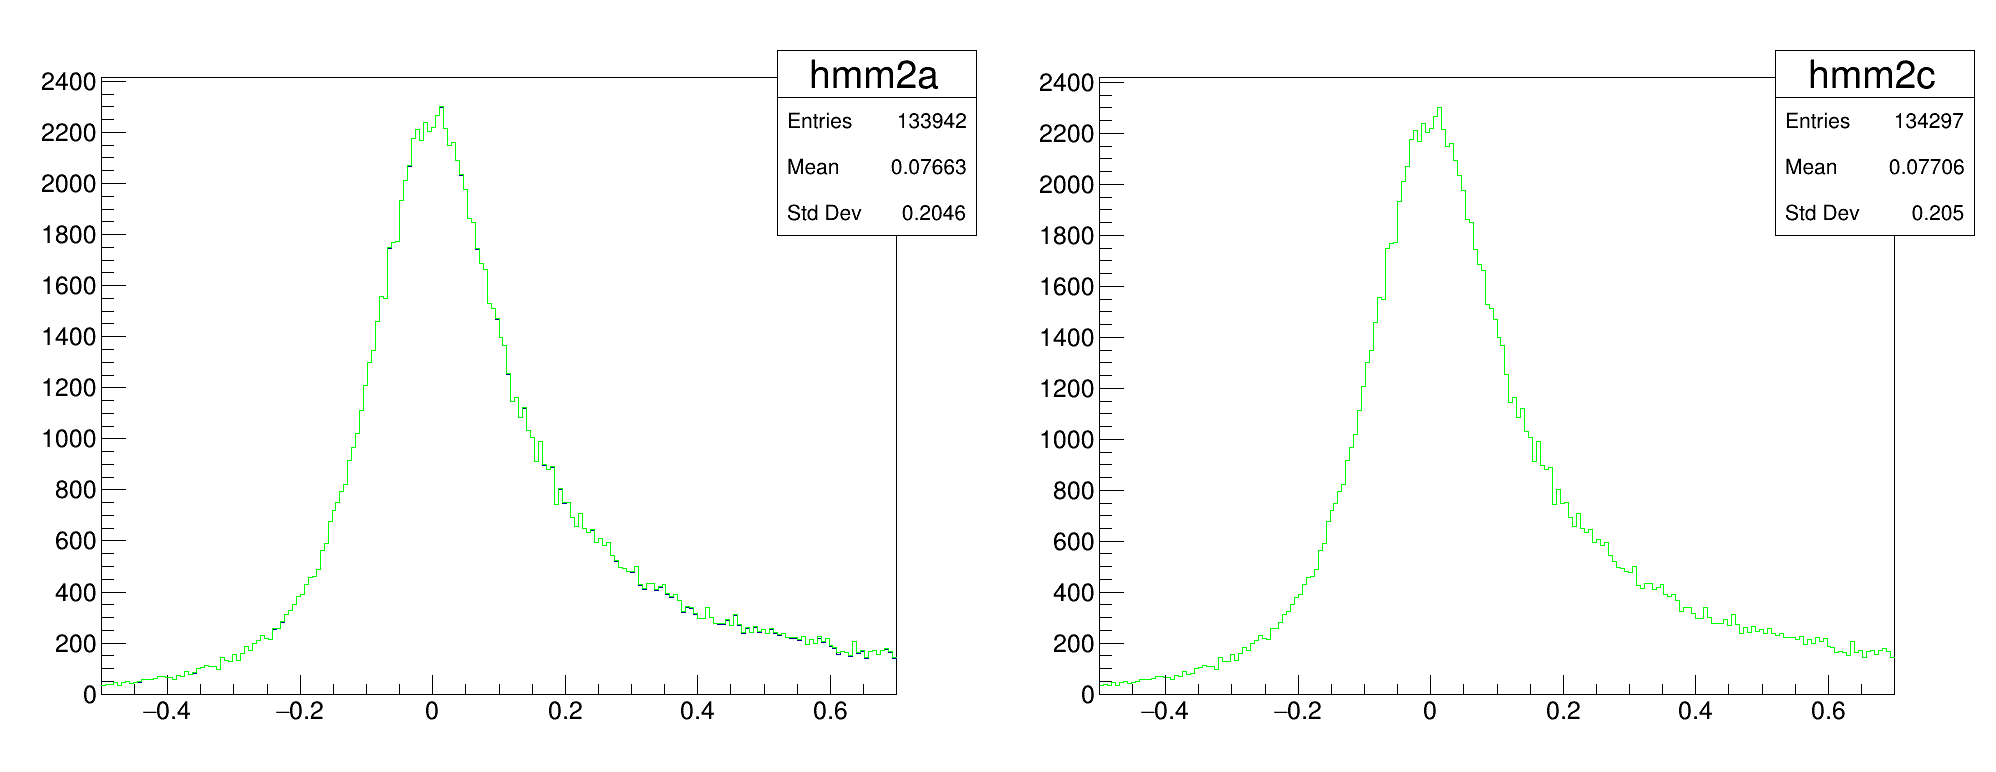

In [100]:
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1,0.001,0.001)
c1.Draw()

#hthp = rdf.Filter("dpt<0.3 && dpz<0.5").Histo2D(("hthp","",200,0,4,200,0,10), "pp", "ftheta")
#hthp.Draw("colz")

#hmm2p = rdf.Filter("dpt<0.3 && dpz<0.5").Histo2D(("hmm2p","",200,0,4,200,-0.5,0.7), "pp", "mm2")
#hmm2p.Draw("colz")

#hdptth =rdf.Histo2D(("dptth","",100,0,5,100,0,0.5), "ftheta","dpt")
#hdptth.Draw("colz")

#hdpzth =rdf.Histo2D(("dpzth","",100,0,5,100,-0.50,0.5), "ftheta","dpz")
#hdpzth.Draw("colz")

hmm2a = rdf.Filter("dpt<0.4 && abs(dpz)<0.5 && abs(dphi)<3.5").Histo1D(("hmm2a","",200,-0.5,0.7), "mm2")
hmm2b = rdf.Filter("abs(dpx)<0.4 && abs(dpy)<0.4 && abs(dpz)<0.5 && abs(dphi)<3.5").Histo1D(("hmm2b","",200,-0.5,0.7), "mm2")

hmm2c = rdf.Filter("abs(dpx)<0.4 && abs(dpy)<0.4 && abs(dpz)<0.5 && abs(dphi)<3.5").Histo1D(("hmm2c","",200,-0.5,0.7), "mm2")


hmisse = rdf.Filter("dpt<0.4 && dpz<0.5").Histo1D(("hmisse","",200,-1,1), "misse")
h2 = rdf.Filter("dpt<0.4 && dpz<0.5").Histo2D(("hmm2ftheta","",200,0,5,200,-0.5,0.7), "ftheta", "mm2")


c1.cd(1)
h2.Draw("colz")
hmm2a.Draw("colz")
hmm2b.SetLineColor(2)
hmm2b.Draw("same")
hmm2c.SetLineColor(3)
hmm2c.Draw("same")

#hmisse.Draw()
#hmm2th.Draw("colz")
c1.cd(2)
hmm2c.Draw("colz")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


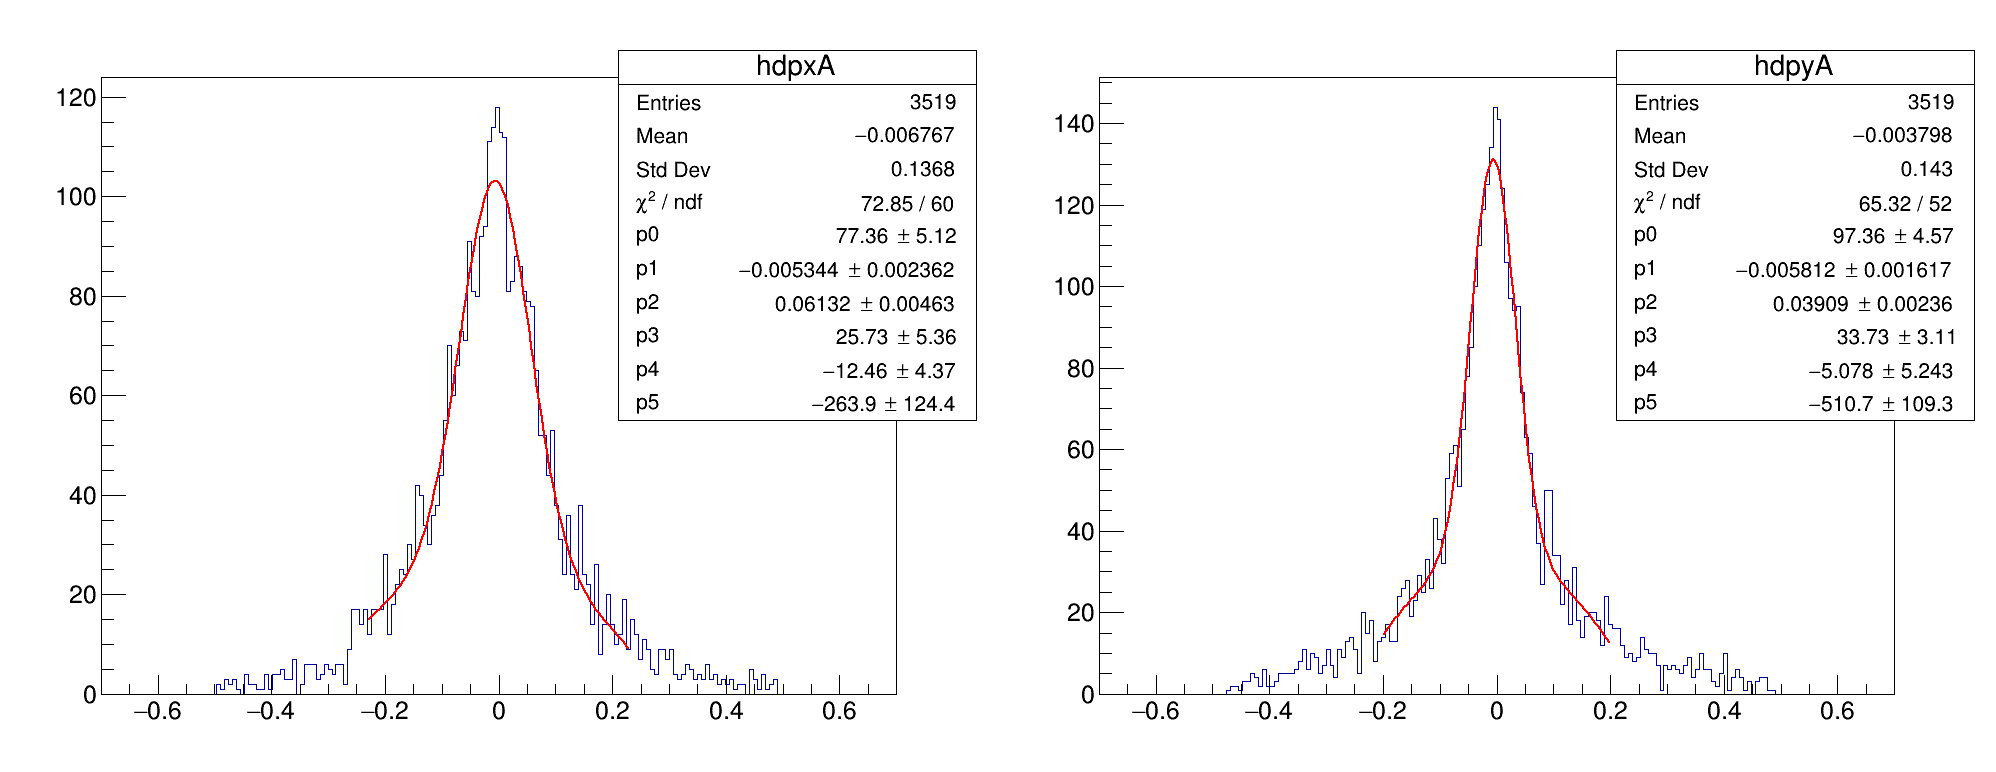

In [81]:
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1,0.001,0.001)
c1.Draw()

#rdf = rdf.Define("dptt", "dpy>0 ? dpt : -dpt")
hdpxA = rdf.Filter("the>30 && abs(dphi)<3").Histo1D(("hdpxA","",200,-0.7,0.7), "dpx")

hdpyA = rdf.Filter("the>30 && abs(dphi)<3").Histo1D(("hdpyA","",200,-0.7,0.7), "dpy")

ROOT.gStyle.SetOptFit(1)

c1.cd(1)
fdpx = ROOT.TF1("fdpx","gaus(0)+pol2(3)", -0.23,0.23)
fdpx.SetParameters(1,0,0.1,1,1)
hdpxA.Fit(fdpx,"RQ")
hdpxA.Draw()

c1.cd(2)
fdpy = ROOT.TF1("fdpy","gaus(0)+pol2(3)", -0.2,0.2)
fdpy.SetParameters(1,0,0.1,1,1)
hdpyA.Fit(fdpy,"RQ")
hdpyA.Draw()
